In [2]:
from skimage import io,filters, morphology, measure, draw,exposure
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.filters import threshold_otsu
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib import cm
from skimage.filters import threshold_multiotsu
import matplotlib
from scipy import ndimage
import sys
sys.path.insert(1, '<PATH/TO/DIR>WAVE/')
import identify_rings as idr
import warnings
warnings.filterwarnings("ignore")

In [3]:
PATH = '<PATH/TO/DIR/>WAVE/PAKPBD/'

# Generate linescane data for lamellipodia

In [4]:
# Load all precropped region and project on x axis for linescan quantification
path = PATH + 'fmlp/cropped_images_for_analysis/'
images_file = [f for f in os.listdir(path) if f.endswith('.tif')]
wave_scan = []
rac_scan = []
for file in images_file:
    image = io.imread(path+file)
    wave = image[1]
    rac = image[0]
    #Projection on x axis
    wave_scan.append(np.sum(wave, axis = 0))
    rac_scan.append(np.sum(rac, axis = 0))
wave_scan = np.array(wave_scan)
rac_scan = np.array(rac_scan)

In [6]:
# Smooth and normalize the linescan data
rac_norm = []
for rac in rac_scan:
    rac = ndimage.gaussian_filter1d(rac, sigma =2)
    rac_norm.append((rac-np.min(rac))/(np.max(rac)-np.min(rac)))

In [7]:
# Smooth and normalize the linescan data
wave_norm = []
for wave in wave_scan:
    wave = ndimage.gaussian_filter1d(wave, sigma =2)
    wave_norm.append((wave-np.min(wave))/(np.max(wave)-np.min(wave)))

In [8]:
df_wave = pd.DataFrame(wave_norm)
df_rac = pd.DataFrame(rac_norm)

# Generate linescan data for nanorings

In [5]:
image = io.imread(PATH + 'latB/example_images/240621_sra1-egfp_pakpbd_latb_012_SIR.tif')

In [6]:
image.shape

(5, 2, 1024, 1024)

In [7]:
rac = image[:,0,:,:]
wave = image[:,1,:,:]

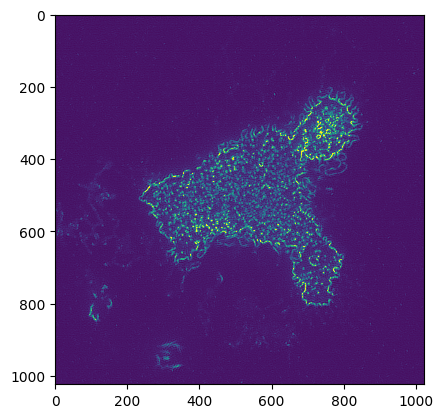

In [8]:
plt.imshow(wave[0],vmax = 400)

In [9]:
threshold_otsu(image)

124.6387

yes
11.0 4.5 0.7468354430379747


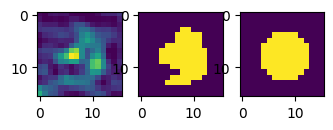

51.0 4.5 0.7162162162162162


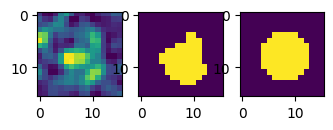

64.0 3.7 0.723404255319149


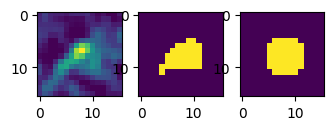

84.0 2.9000000000000004 0.7333333333333333


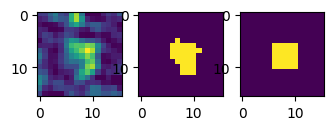

92.0 3.7 0.7413793103448276


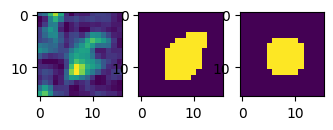

108.0 3.2 0.7111111111111111


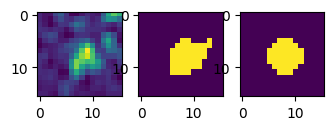

119.0 2.9000000000000004 0.7931034482758621


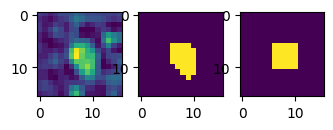

152.0 5.1000000000000005 0.7475728155339806


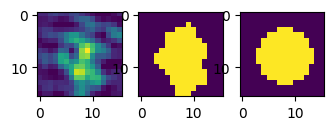

199.0 3.2 0.7555555555555555


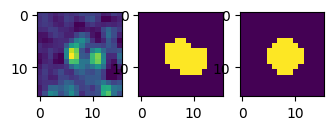

210.0 3.7 0.7608695652173914


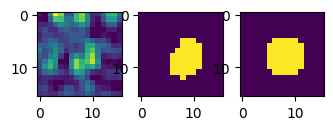

212.0 3.2 0.7272727272727273


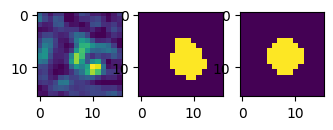

234.0 3.2 0.775


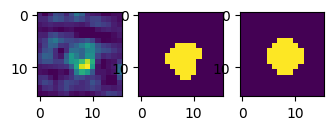

266.0 3.2 0.7105263157894737


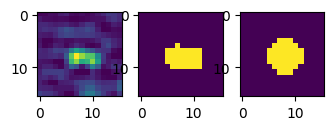

321.0 3.2 0.7837837837837838


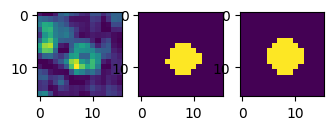

372.0 3.2 0.7142857142857143


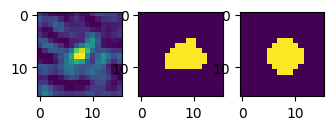

399.0 2.9000000000000004 0.8


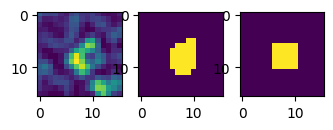

490.0 3.7 0.7446808510638298


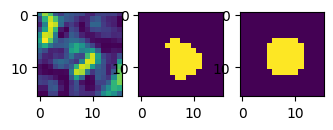

511.0 4.0 0.8461538461538461


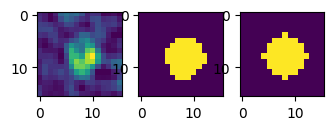

556.0 3.7 0.8125


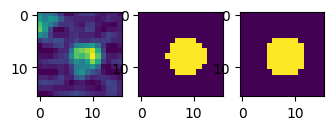

563.0 5.0 0.8085106382978723


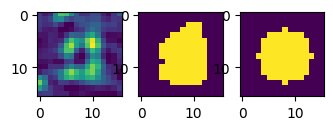

581.0 2.9000000000000004 0.7666666666666667


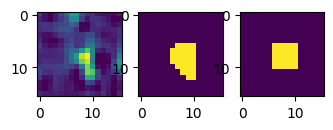

582.0 3.2 0.8108108108108109


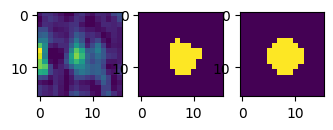

590.0 2.9000000000000004 0.71875


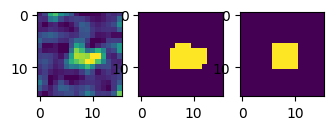

594.0 3.2 0.7380952380952381


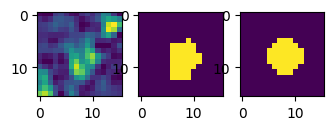

601.0 3.2 0.775


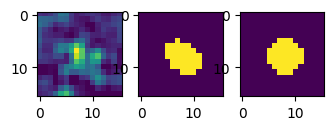

603.0 3.0 0.8387096774193549


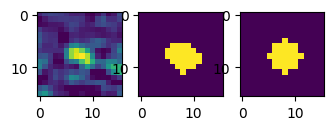

608.0 4.0 0.75


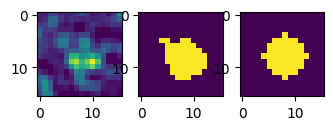

632.0 3.7 0.74


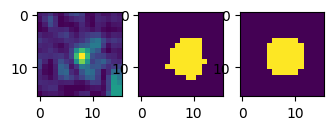

637.0 3.7 0.8043478260869565


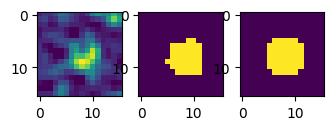

646.0 3.2 0.7435897435897436


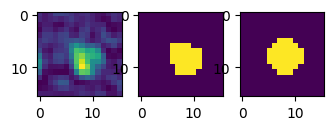

676.0 3.7 0.7647058823529411


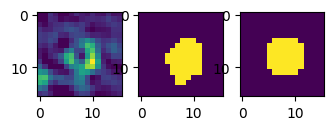

748.0 3.0 0.7647058823529411


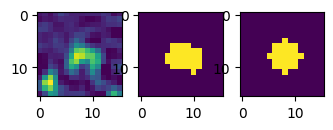

756.0 2.9000000000000004 0.8214285714285714


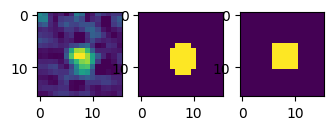

yes
127.0 2.9000000000000004 0.7333333333333333


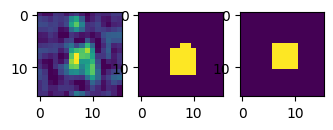

185.0 3.2 0.7441860465116279


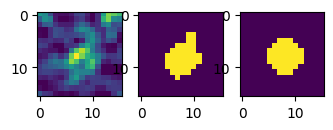

216.0 4.0 0.75


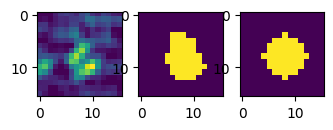

223.0 3.2 0.7317073170731707


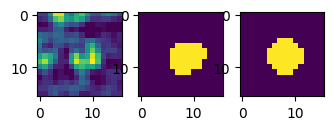

233.0 3.7 0.7608695652173914


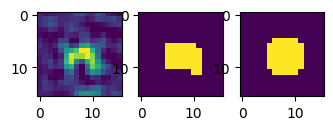

274.0 2.9000000000000004 0.7741935483870968


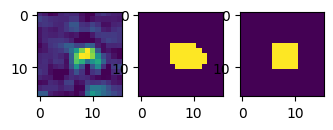

324.0 3.7 0.8723404255319149


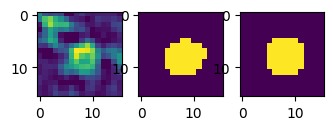

388.0 3.2 0.7674418604651163


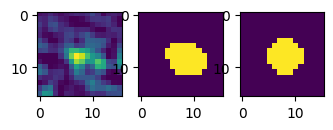

390.0 2.9000000000000004 0.7586206896551724


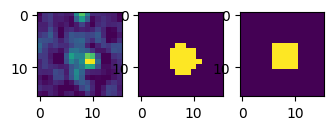

533.0 3.7 0.7272727272727273


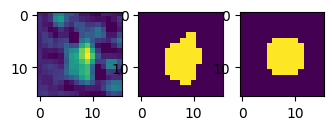

586.0 3.2 0.7948717948717948


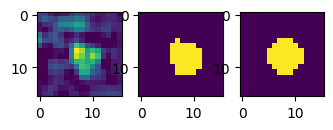

587.0 3.2 0.8974358974358975


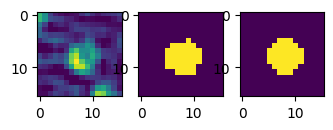

595.0 5.1000000000000005 0.8061224489795918


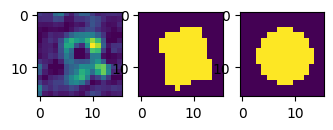

609.0 3.2 0.75


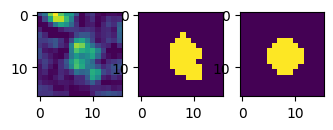

627.0 3.2 0.8604651162790697


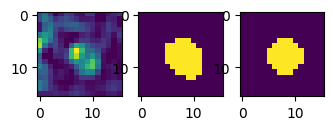

628.0 3.2 0.7555555555555555


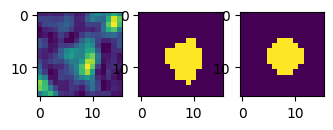

633.0 3.2 0.9210526315789473


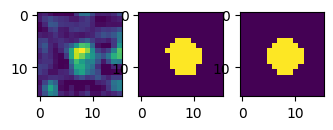

640.0 3.0 0.7352941176470589


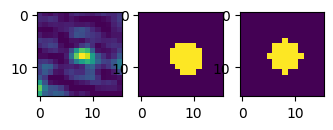

648.0 4.0 0.7413793103448276


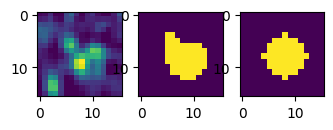

669.0 3.2 0.7380952380952381


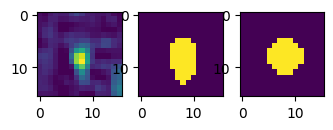

706.0 2.9000000000000004 0.7419354838709677


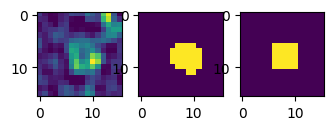

742.0 2.9000000000000004 0.7586206896551724


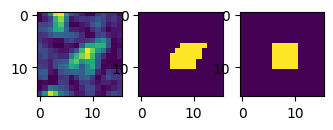

802.0 3.0 0.8125


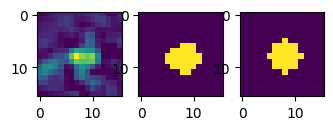

yes
78.0 2.9000000000000004 0.7419354838709677


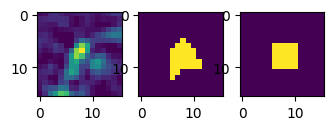

110.0 4.2 0.7272727272727273


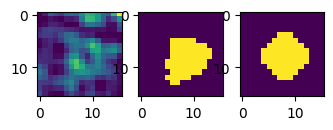

111.0 2.9000000000000004 0.7575757575757576


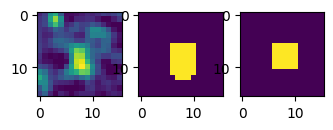

195.0 3.2 0.7142857142857143


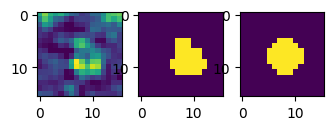

204.0 3.2 0.825


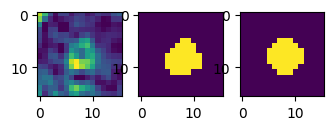

228.0 3.7 0.7959183673469388


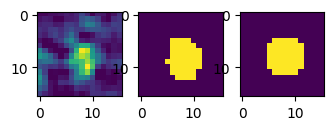

229.0 3.7 0.7777777777777778


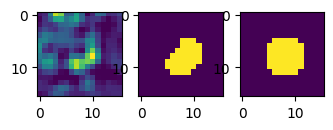

280.0 3.2 0.7368421052631579


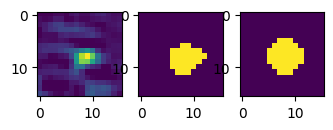

338.0 3.2 0.775


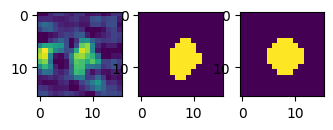

437.0 3.2 0.7297297297297297


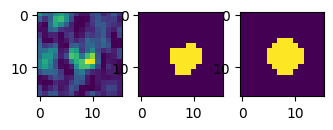

494.0 3.7 0.7142857142857143


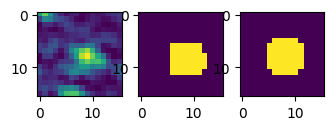

548.0 3.0 0.7575757575757576


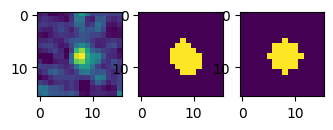

559.0 3.2 0.7435897435897436


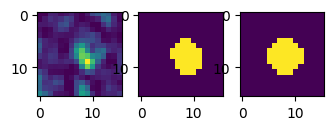

564.0 3.7 0.717391304347826


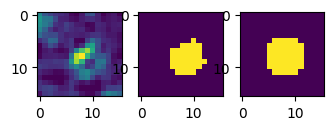

569.0 3.2 0.825


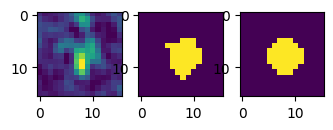

594.0 3.0 0.7222222222222222


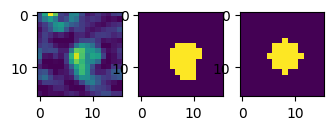

620.0 2.9000000000000004 0.8571428571428571


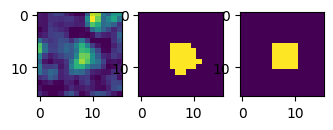

636.0 2.9000000000000004 0.7575757575757576


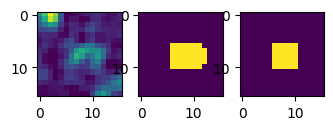

650.0 3.7 0.7647058823529411


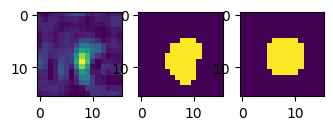

656.0 3.0 0.8333333333333334


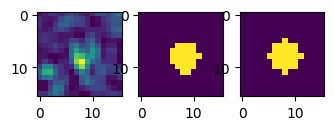

709.0 3.0 0.8666666666666667


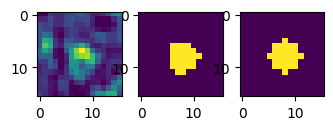

yes
69.0 5.1000000000000005 0.7669902912621359


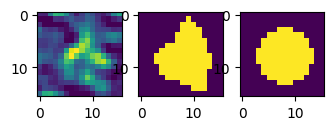

85.0 3.2 0.7441860465116279


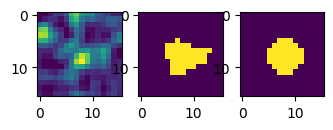

92.0 3.2 0.8292682926829268


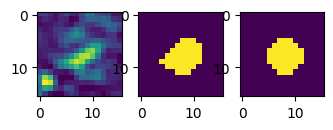

107.0 5.0 0.7311827956989247


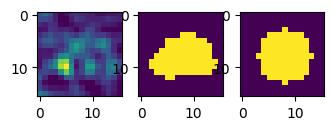

124.0 3.7 0.851063829787234


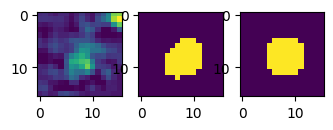

146.0 3.0 0.7741935483870968


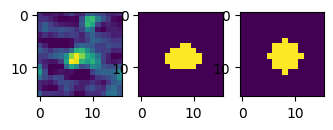

213.0 3.7 0.74


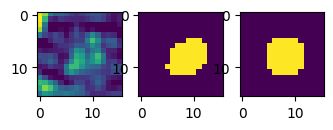

222.0 3.7 0.75


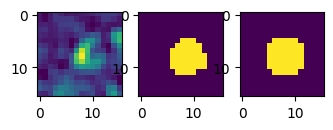

238.0 4.0 0.7407407407407407


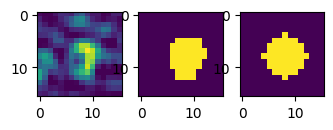

240.0 3.7 0.74


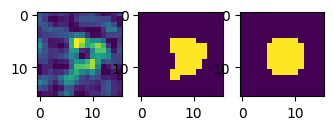

325.0 3.2 0.7317073170731707


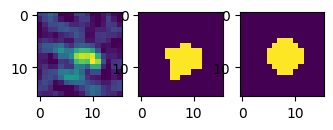

343.0 3.2 0.85


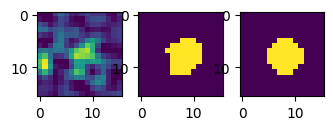

463.0 2.9000000000000004 0.7586206896551724


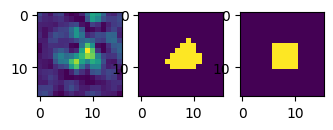

508.0 3.7 0.8936170212765957


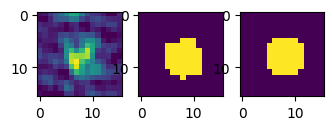

545.0 2.9000000000000004 0.7931034482758621


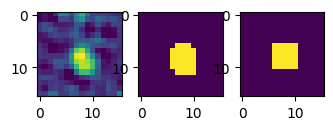

564.0 3.0 0.7575757575757576


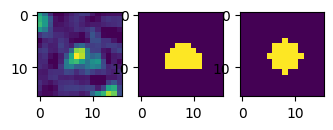

574.0 3.0 0.71875


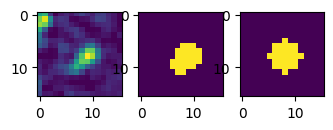

590.0 3.0 0.7647058823529411


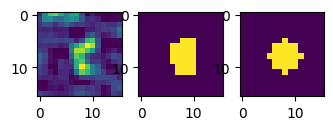

603.0 3.0 0.7142857142857143


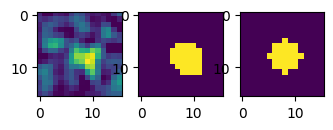

621.0 3.2 0.7948717948717948


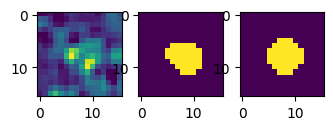

623.0 5.0 0.7282608695652174


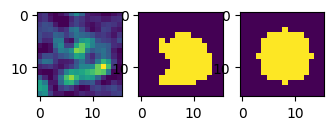

645.0 4.300000000000001 0.765625


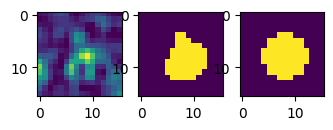

646.0 4.5 0.782051282051282


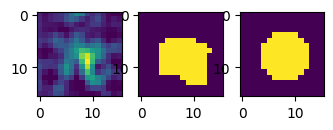

659.0 3.2 0.85


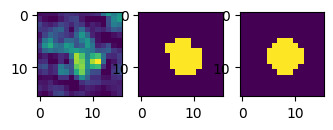

667.0 4.5 0.775


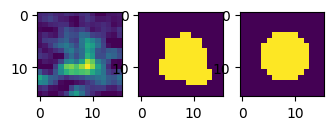

670.0 3.7 0.7346938775510204


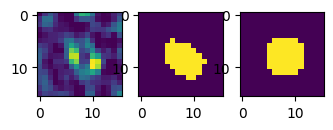

711.0 3.0 0.7272727272727273


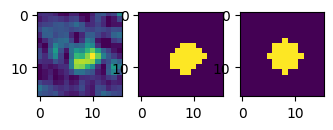

778.0 3.2 0.8378378378378378


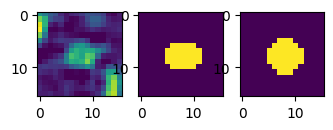

yes
50.0 3.7 0.7959183673469388


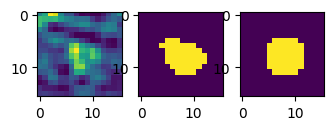

91.0 3.7 0.7115384615384616


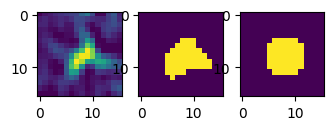

148.0 2.9000000000000004 0.8571428571428571


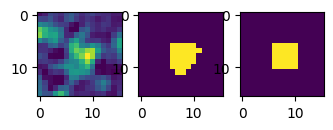

154.0 3.0 0.75


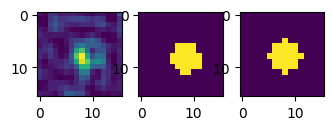

155.0 3.7 0.7333333333333333


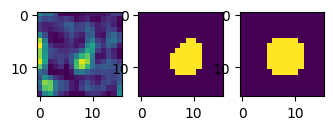

182.0 2.9000000000000004 0.8064516129032258


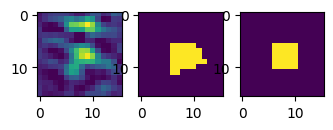

221.0 3.7 0.7358490566037735


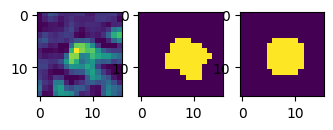

230.0 4.2 0.78125


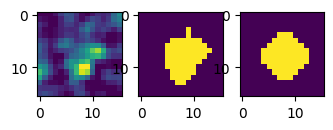

241.0 3.7 0.72


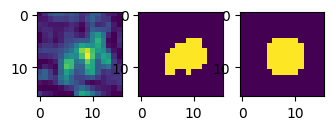

255.0 3.2 0.717948717948718


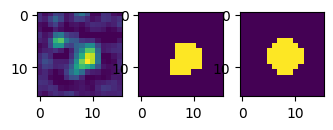

281.0 2.9000000000000004 0.8


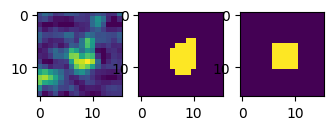

343.0 3.0 0.78125


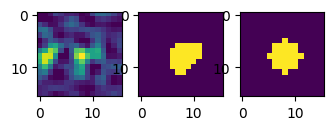

350.0 2.9000000000000004 0.71875


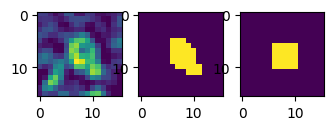

458.0 3.0 0.7428571428571429


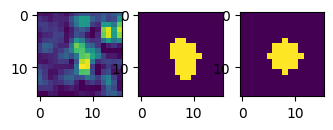

494.0 3.7 0.7924528301886793


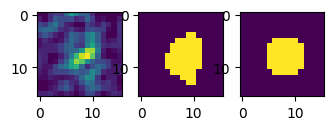

542.0 3.2 0.7391304347826086


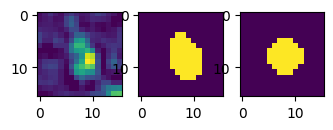

543.0 3.2 0.8421052631578947


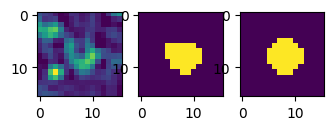

586.0 3.7 0.76


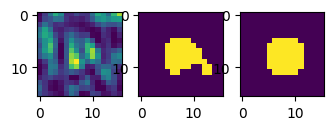

599.0 3.0 0.7142857142857143


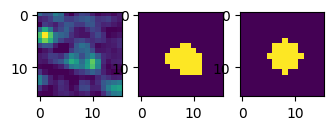

611.0 3.7 0.7916666666666666


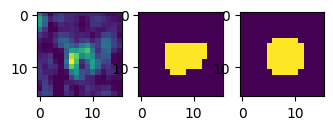

626.0 3.7 0.7346938775510204


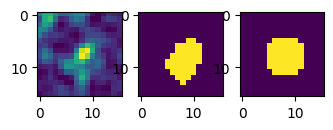

641.0 4.5 0.8051948051948052


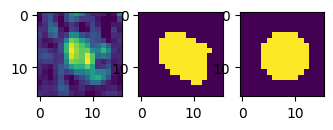

In [10]:
image = wave
wave_lines = []
rac_lines = []
opt_threshold = threshold_otsu(image)+30
for i in range(image.shape[0]):
    prop, label_mask_clean = idr.seg_cells(image[i], opt_threshold, 1.2, 25, 100, False)
    features = pd.DataFrame()
    for j in range(len(prop)): 
        y_center, x_center = prop[j].centroid # note that image coordinates are often given as (y, x) rather than (x, y)
        features = features.append([{'label':prop[j].label,'x': prop[j].centroid[0],
                                     'y': prop[j].centroid[1],'length': prop[j].major_axis_length,'frame': i}])
    wave_line,rac_line = idr.ring_fitting_wave_rac(image[i],rac[i], label_mask_clean, features, 8, 0.71, True)
    wave_lines.extend(wave_line)
    rac_lines.extend(rac_line)

In [11]:
result_wave = []
result_rac= []
result_wave.extend(wave_lines)
result_rac.extend(rac_lines)

In [12]:
# Smooth and normalize the linescan data
wave_norm = []
for wave in result_wave:
    wave = ndimage.gaussian_filter1d(wave, sigma =0.1)
    wave_norm.append((wave-np.min(wave))/(np.max(wave)-np.min(wave)))

In [13]:
# Smooth and normalize the linescan data
rac_norm = []
for rac in result_rac:
    rac = ndimage.gaussian_filter1d(rac, sigma =0.1)
    rac_norm.append((rac-np.min(rac))/(np.max(rac)-np.min(rac)))
    

In [14]:
wave_norm = pd.DataFrame(wave_norm)
rac_norm = pd.DataFrame(rac_norm)

# Generate linescane plot

In [15]:
df_wave = pd.read_csv(PATH + 'fmlp/csv_data/wave_linescan.csv',index_col=0)
df_rac = pd.read_csv(PATH + 'fmlp/csv_data/rac_linescan.csv',index_col= 0)

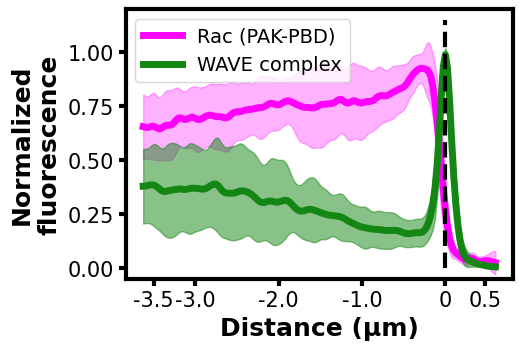

In [16]:
_,ax = plt.subplots(figsize = (5,3.5))
plt.plot(df_rac.mean(), color= 'magenta',lw = 5,label = 'Rac (PAK-PBD)')
plt.fill_between(x = df_rac.columns,y1 = df_rac.mean()-df_rac.std(),y2 = df_rac.mean()+df_rac.std(), color= 'magenta',alpha = 0.3)
plt.plot(df_wave.mean(),color = '#138613',lw = 5,label = 'WAVE complex')
plt.fill_between(x = df_wave.columns,y1 = df_wave.mean()-df_wave.std(),y2 = df_wave.mean()+df_wave.std(),color = '#138613',alpha = 0.5)
plt.legend(fontsize = 14)
plt.tick_params(labelsize = 15)
plt.ylim(-0.05,1.2)
plt.vlines(145,-0,1.15,color = 'black',lw = 3,ls = '--')
plt.xticks(ticks = [5,25,65,105,145,164],labels = [-3.5,-3.0,-2.0,-1.0,0,0.5])
plt.xlabel('Distance (µm)',size = 18,fontweight = 'bold')
plt.ylabel('Normalized\nfluorescence',size = 18,fontweight = 'bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.savefig(PATH + 'FigS1B_fMLP_linescane.png',dpi = 300,bbox_inches = 'tight')

In [17]:
wave_norm_r = pd.read_csv(PATH + "latB/csv_data/wave_linescan.csv")
rac_norm_r=pd.read_csv(PATH + "latB/csv_data/rac_linescan.csv")

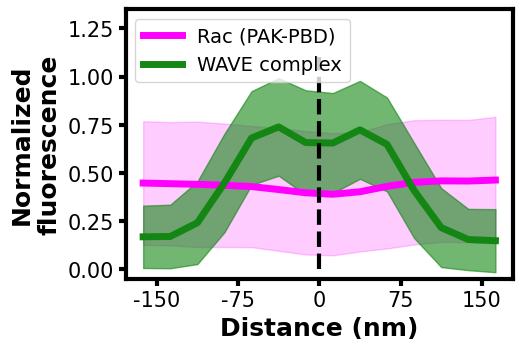

In [18]:
_,ax = plt.subplots(figsize = (5,3.5))
rac_norm = rac_norm_r.iloc[:,3:]
plt.plot(rac_norm.mean(),color = 'magenta',lw = 5,label = 'Rac (PAK-PBD)')
plt.fill_between(x = rac_norm.columns,y1 = rac_norm.mean()-rac_norm.std(),y2 = rac_norm.mean()+rac_norm.std(), color= 'magenta',alpha = 0.2)
wave_norm = wave_norm_r.iloc[:,3:]
plt.plot(wave_norm.mean(),color = '#138613',lw = 5,label = 'WAVE complex')
plt.fill_between(x = wave_norm.columns,y1 = wave_norm.mean()-wave_norm.std(),y2 = wave_norm.mean()+wave_norm.std(),color = '#138613',alpha = 0.6)
plt.legend(fontsize = 14,loc = 'upper left')
plt.tick_params(labelsize = 15)
plt.vlines(6.5,0,1.1,color = 'black',lw = 3,ls = '--')
plt.ylim(-0.05,1.35)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.xticks(labels = [-150,-75,0,75,150],ticks = [0.5,3.5,6.5,9.5,12.5])
plt.xlabel('Distance (nm)',size = 18,fontweight = 'bold')
plt.ylabel('Normalized\nfluorescence',size = 18,fontweight = 'bold')
plt.savefig(PATH + 'FigS1D_Latb_linescane.png',dpi = 300,bbox_inches = 'tight')